В этом задании две части - теоретическая и практическая. Теорию можно набирать в латехе или просто решить на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за задание - 10.

# Часть 1 (теоретическая).

## Задание 1 (**1.5 балла**).

Пусть $f(X)=ln(detX), X\in\mathbb{R}^{n\times n}$. Найдите производную $\nabla_X f(X).$

## Задание 2 (**2 балла**).

Пусть $f(x)=x^Texp(xx^T)x, x\in\mathbb{R}^n,$ а $exp(B)$ - матричная экспонента, $B\in\mathbb{R}^{n\times n}.$ Матричной экспонентой обозначают ряд

$I_n+\frac{B}{1!}+\frac{B^2}{2!}+\dots=\sum\limits_{k=0}^{\infty}\frac{B^k}{k!}.$

Найдите производную $\nabla_x f(x).$

## Задание 3 (**1.5 балла**).

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

## Часть 2 (практическая).

## Задание 4 (**1 балл**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [3]:
import numpy as np

def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [4]:
def compute_cost(X, y, theta, length):
    cost = (1./length) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        idx = np.random.randint(m - 1)
        params = params - 2./1 * learning_rate * (X[idx] * ((X[idx] @ params) - y[idx]))
        cost_track[i] = compute_cost(X[idx], y[idx], params, 1)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**): 

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации. 

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [29]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features 
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123) 

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [30]:
np.set_printoptions(suppress=True)
np.random.seed(seed=42)

#### Метод градиентного спуска из семинара.

In [31]:
def gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    length = len(y)

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params, length)

    return cost_track, params

def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

#### Аналитическое решение.

In [32]:
%%time
analytic_weights = ols_solution(X, y)
analytic_predict = predict(X, analytic_weights)

CPU times: user 112 ms, sys: 131 ms, total: 243 ms
Wall time: 38.2 ms


#### Решение методом GD

In [33]:
%%time
gd_track, gd_weights = gradient_descent(X, y, 0.01, 10000)
gd_predict = predict(X, gd_weights)

CPU times: user 2min 24s, sys: 2min 32s, total: 4min 56s
Wall time: 26.7 s


#### Решение методом SGD

In [34]:
%%time
sgd_track, sgd_weights = stochastic_gradient_descent(X, y, 0.01, 10000)
sgd_predict = predict(X, sgd_weights)

CPU times: user 557 ms, sys: 913 ms, total: 1.47 s
Wall time: 301 ms


#### Вычислим качество предсказания:

In [35]:
from sklearn.metrics import r2_score
r2_score(y, analytic_predict)

0.7528937122904231

In [36]:
r2_score(y, gd_predict)

0.7554626185750482

In [37]:
r2_score(y, sgd_predict)

0.7395349424704922

#### Ответы на вопросы:

1. Аналитический метод справился и GD. SGD - не всегда получается найти минимум т.к. в каждой итерации берём признаки одного объекта.

2. Время выполнения от меньшего к большему: SGD, аналитическое решение, GD

4. У аналитического решения и GD показатель ~ 0.75. SGD - качество не стабильное т.к. в каждой итерации берём признаки одного объекта.Если модифицируем SGD и будем брать batch, то качество улучшится и не будет зависеть от того, удачные или неудачные даныне нам попались. Либо для SGD нужно кратно увеличить число итераций.

3.Для методов GD и SGD нарисуем графики зависимости ошибки (loss) от номера итерации.

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Графики зависимости ошибки (loss) от номера итерации для метода GD')

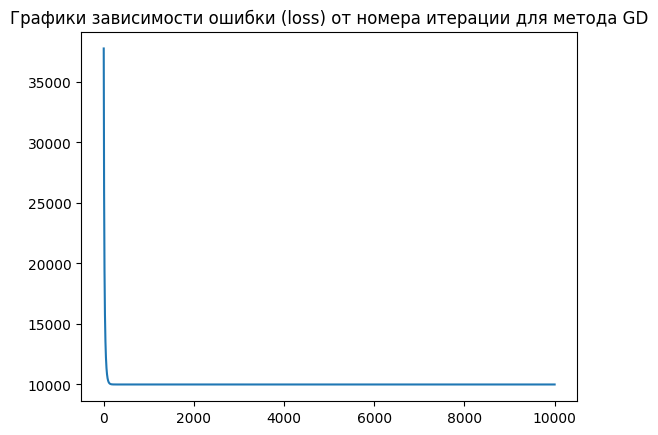

In [44]:
plt.plot(gd_track)
plt.title('Графики зависимости ошибки (loss) от номера итерации для метода GD')

Text(0.5, 1.0, 'Графики зависимости ошибки (loss) от номера итерации для метода SGD')

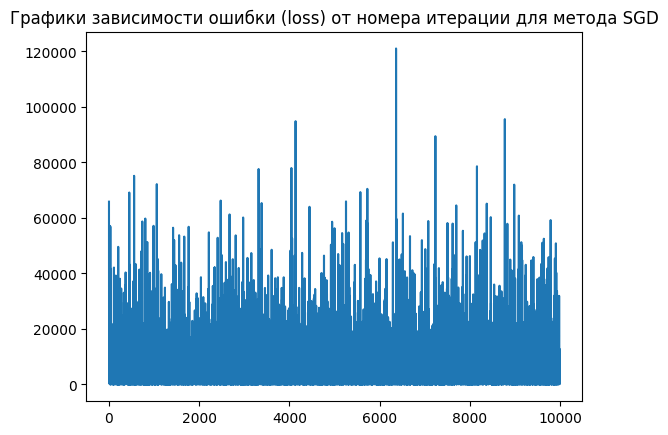

In [45]:
plt.plot(sgd_track)
plt.title('Графики зависимости ошибки (loss) от номера итерации для метода SGD')

## Задание 7 (**2 балла**).
* **(1 балл)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?